# HealthCare Analysis

## EDA

Libraries and Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
print("You are here:",os.getcwdb())

You are here: b'/Users/amithmg/Documents/GitHub/nlp_aiwp_3129'


In [3]:
!dir

zsh:1: command not found: dir


In [4]:
hc_df = pd.read_csv('dataset/kaggle healthcare_dataset.csv')

### Data description and detailing (READMe)

* Health care data has 55500 records and 15 variables
* Patient details are shared in this data such as name, age, gender, medication, doctor and more.
* Data types(dtypes): float64(1), int64(2), object(12).
* Data types must be changed for variables listed below:
    * Discharge Date: object to Date
    * Date of Admission: object to Date




In [5]:
hc_df.shape

(55500, 15)

In [6]:
hc_df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [7]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
hc_df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [9]:
hc_df['Date of Admission'] = pd.to_datetime(hc_df['Date of Admission'])
hc_df['Discharge Date'] = pd.to_datetime(hc_df['Discharge Date'])

In [10]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

### Data Exploration

In [11]:
hc_df['Admission Type'].value_counts()

Elective     18655
Urgent       18576
Emergency    18269
Name: Admission Type, dtype: int64

There are three categories of admission type. Class imbalance is not oberserved as each category has ~18k records.
* Elective
* Urgent
* Emergency

In [12]:
hc_df['Age'].describe(include='all')

count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

The Age of patients is ranging from 13 to 89 years. 
* Plot histogram and Box plot
* Run statistical test for normal distribution

In [13]:
hc_df['Billing Amount'].describe(include='all')

count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: Billing Amount, dtype: float64

Assuming the amount to be in USD. On an average patients are billed $25,539. 
* Plot histogram for skewness check.
* Check the -ve amount under minimum
* Find the records with -ve billing amount

In [14]:
# import matplotlib.pyplot as plt

# # frequencies
# billing_amount = hc_df['Billing Amount']

# # setting the ranges and no. of intervals
# range = (-1000, 55000)
# bins = 250

# # plotting a histogram
# plt.hist(billing_amount, bins, range, color = 'brown',
#         histtype = 'bar', rwidth = 0.8)

# # x-axis label
# plt.xlabel('billing_amount')
# # frequency label
# plt.ylabel('No. of people')
# # plot title
# plt.title('billing_amount Histogram')

# # function to show the plot
# plt.show()

In [15]:
hc_df['Blood Type'].value_counts()

A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Blood Type, dtype: int64

There are eight categories of blood type. Class imbalance is not oberserved as each category has ~6k records.
* A-,A+
* B-,B+
* AB-,AB+
* O-,O+

In [16]:
hc_df['Date of Admission'].describe()

/var/folders/z1/qyczzcsn20q235vpf9n6j17w0000gn/T/ipykernel_70237/1963798732.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hc_df['Date of Admission'].describe()


count                   55500
unique                   1827
top       2024-03-16 00:00:00
freq                       50
first     2019-05-08 00:00:00
last      2024-05-07 00:00:00
Name: Date of Admission, dtype: object

In [17]:
hc_df['Discharge Date'].describe(include='all')

/var/folders/z1/qyczzcsn20q235vpf9n6j17w0000gn/T/ipykernel_70237/2651826647.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hc_df['Discharge Date'].describe(include='all')


count                   55500
unique                   1856
top       2020-03-15 00:00:00
freq                       53
first     2019-05-09 00:00:00
last      2024-06-06 00:00:00
Name: Discharge Date, dtype: object

Patients data ranges from May 2019 to May 2024.
* Time series analysis can be performed.
* Trend in Admission dates must be observed along side other variables.
* Time taken by patients from admission to discharge must be noted. 

In [18]:
hc_df['Doctor'].value_counts()

Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: Doctor, Length: 40341, dtype: int64

In [19]:
hc_df['Doctor'].describe(include='all')

count             55500
unique            40341
top       Michael Smith
freq                 27
Name: Doctor, dtype: object

* Among all doctors Michael Smith has attended most patients followed by Robert Smith.
* There are 40,341 unique doctors in this data.
* Top 10 Doctors in the data, top 10 doctors who attended most patients by Hospital, Gender, Diseases and more can be studied furthur. 

In [20]:
hc_df['Gender'].describe(include='all')

count     55500
unique        2
top        Male
freq      27774
Name: Gender, dtype: object

In [21]:
hc_df['Gender'].value_counts()

Male      27774
Female    27726
Name: Gender, dtype: int64

There are 2 genders Male and Female.
* Gender based studies can be sensitive.
* In scope of diseases, hospital, medication, test results analysis will be performed for futher insights and trends.

In [22]:
hc_df['Hospital'].value_counts()

LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: Hospital, Length: 39876, dtype: int64

In [23]:
hc_df['Hospital'].describe(include='all')

count         55500
unique        39876
top       LLC Smith
freq             44
Name: Hospital, dtype: object

There are 39,876 unique hospitals in this data. LLC Smith hospital is the most visited followed by Ltd Smith.

In [24]:
hc_df['Insurance Provider'].value_counts()

Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: Insurance Provider, dtype: int64

In [25]:
hc_df['Insurance Provider'].describe()

count     55500
unique        5
top       Cigna
freq      11249
Name: Insurance Provider, dtype: object

Cigna is the top insurance provider among 5 other insurance providers. The 5 insurance providers are equally distributed with ~11k among all patients.
* list the medical conditions.
* list the insurance providers

In [26]:
hc_df['Medical Condition'].value_counts()

Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64

In [27]:
hc_df['Medical Condition'].describe(include='all')

count         55500
unique            6
top       Arthritis
freq           9308
Name: Medical Condition, dtype: object

Arthritis is the top Medical condition among 6 other medical conditiona. The 6 medical conditiona are equally distributed with ~9k among all patients.
* list the medical conditions.
* list the medical conditions

In [28]:
hc_df['Medication'].value_counts()

Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: Medication, dtype: int64

In [29]:
hc_df['Medication'].describe()

count       55500
unique          5
top       Lipitor
freq        11140
Name: Medication, dtype: object

Lipitor is the top Medication among 5 other medications. The 5 medications are equally distributed with ~11k among all patients.
* list the medical conditions

In [30]:
hc_df['Room Number'] = hc_df['Room Number'].astype(str)

In [31]:
hc_df['Room Number'].describe(include='all')

count     55500
unique      400
top         393
freq        181
Name: Room Number, dtype: object

In [32]:
hc_df['Room Number'].value_counts()

393    181
491    177
104    175
420    175
209    171
      ... 
253    112
254    111
257    111
381    110
398    109
Name: Room Number, Length: 400, dtype: int64

There are 400 rooms across all the hospitals in this dataset.
Most used rooms are 393, 491, 104, 420 and 209.

* plot a graph to see the distribution

In [33]:
hc_df['Test Results'].value_counts()

Abnormal        18627
Normal          18517
Inconclusive    18356
Name: Test Results, dtype: int64

In [34]:
hc_df['Test Results'].describe()

count        55500
unique           3
top       Abnormal
freq         18627
Name: Test Results, dtype: object

There are 3 types of results Abnormal, Normal and Inconclusive.

In [35]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  object        
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

### Analysis to gain further insights from the data.

* Creation of additional variables.

In [36]:
hc_df['Days in bed'] = hc_df['Discharge Date'] - hc_df['Date of Admission']

In [37]:
hc_df['Days in bed'].head(10)

0    2 days
1    6 days
2   15 days
3   30 days
4   20 days
5    4 days
6   12 days
7   10 days
8   13 days
9   30 days
Name: Days in bed, dtype: timedelta64[ns]

In [38]:
hc_df['Days in bed'] = hc_df['Days in bed'].astype('timedelta64[D]').astype(np.int64)


In [39]:
hc_df['Days in bed'].value_counts(sort=True)

21    1959
14    1909
20    1907
6     1903
11    1895
19    1890
7     1886
27    1884
30    1874
9     1868
29    1867
23    1866
25    1864
13    1864
4     1863
28    1853
2     1844
12    1843
3     1841
5     1832
8     1828
26    1819
18    1819
17    1818
1     1817
10    1802
15    1785
22    1784
24    1759
16    1757
Name: Days in bed, dtype: int64

In [40]:
# import matplotlib.pyplot as plt

# # frequencies
# Days_in_bed = hc_df['Days in bed']

# # setting the ranges and no. of intervals
# range = (0, 35)
# bins = 5

# # plotting a histogram
# plt.hist(Days_in_bed, bins, range, color = 'orange',
#         histtype = 'bar', rwidth = 0.8)

# # x-axis label
# plt.xlabel('Days_in_bed')
# # frequency label
# plt.ylabel('No. of people')
# # plot title
# plt.title('Days_in_bed Histogram')

# # function to show the plot
# plt.show()

In [41]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  object        
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [42]:
hc_df['Age'].describe()

count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

In [43]:
# import matplotlib.pyplot as plt

# # frequencies
# ages = hc_df['Age']

# # setting the ranges and no. of intervals
# range = (10, 89)
# bins = 5 

# # plotting a histogram
# plt.hist(ages, bins, range, color = 'skyblue',
#         histtype = 'bar', rwidth = 0.8)

# # x-axis label
# plt.xlabel('age')
# # frequency label
# plt.ylabel('No. of people')
# # plot title
# plt.title('Age Histogram')

# # function to show the plot
# plt.show()

In [44]:
import pandas as pd

def create_age_buckets(df, age_column, bucket_column, bins, labels):
    df[bucket_column] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df

# Example usage
bins = [0, 18, 30, 50, 120]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

hc_df = create_age_buckets(hc_df, 'Age', 'Age Group', bins, labels)

In [45]:
hc_df['Age Group'].value_counts()

Senior         29498
Adult          16309
Young Adult     9577
Child            116
Name: Age Group, dtype: int64

In [46]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  object        
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

### Scatter

In [47]:
# import matplotlib.pyplot as plt

# # x-axis values
# x = hc_df['Days in bed']
# # y-axis values
# y = hc_df['Age']

# # plotting points as a scatter plot
# plt.scatter(x, y, label= "stars", color= "green", 
#             marker= "*", s=5)

# # x-axis label
# plt.xlabel('x - axis')
# # frequency label
# plt.ylabel('y - axis')
# # plot title
# plt.title('Age vs Days in bed')
# # showing legend
# plt.legend()

# # function to show the plot
# plt.show()

## Understanding Patient Health Profiles:

### Clusters based on Medical Condition, Age Group, Test Results, and Days in Bed: 
This could reveal groups of patients with similar health issues, severity, and recovery patterns. You might find clusters of patients with specific chronic diseases, post-operative recovery profiles, or those with similar abnormal test results.


In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [49]:

# Identify categorical and numerical features for clustering
categorical_features = ['Medical Condition', 'Age Group', 'Test Results']
numerical_features = ['Days in bed']

# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [50]:
categorical_transformer

OneHotEncoder(handle_unknown='ignore')

In [51]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['Days in bed']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Medical Condition', 'Age Group',
                                  'Test Results'])])

In [67]:
# Define the KMeans model
# You'll need to determine the optimal number of clusters (n_clusters)
# We'll start with a guess (e.g., 3) and discuss how to find the optimal value
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Create a pipeline to first preprocess the data and then apply KMeans
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])

# Fit the pipeline to the data
pipeline.fit(hc_df)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Days in bed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Medical Condition',
                                                   'Age Group',
                                                   'Test Results'])])),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

In [68]:

# Transform the data
transformed_data = pipeline.transform(hc_df)

# Get the cluster labels assigned to each patient
cluster_labels = pipeline.predict(hc_df)

# Add the cluster labels to the DataFrame
hc_df['Cluster'] = cluster_labels

# Display the DataFrame with cluster assignments
print(hc_df['Cluster'])

0        8
1        6
2        7
3        3
4        9
        ..
55495    9
55496    7
55497    9
55498    2
55499    5
Name: Cluster, Length: 55500, dtype: int32


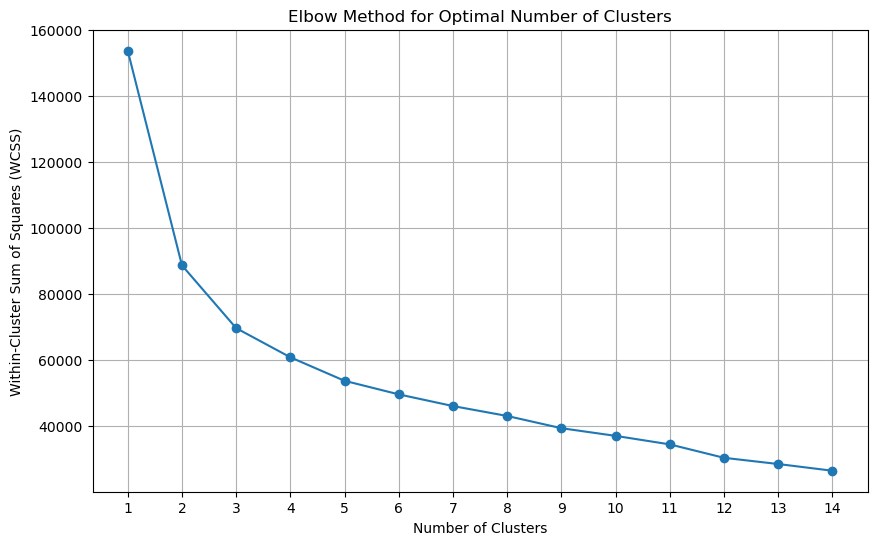

In [69]:
# Apply the Elbow Method
wcss = []
range_n_clusters = range(1, 15)  # Try a range of 1 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [70]:
# You can now analyze the characteristics of each cluster
print("\nCluster Characteristics:")
print(hc_df.groupby('Cluster').agg({
    'Medical Condition': lambda x: x.mode()[0] if not x.empty else None,
    'Age Group': lambda x: x.mode()[0] if not x.empty else None,
    'Test Results': lambda x: x.mode()[0] if not x.empty else None,
    'Days in bed': 'mean',
    'Days in bed': ['mean', 'min', 'max']
}))


Cluster Characteristics:
        Medical Condition    Age Group  Test Results Days in bed        
                 <lambda>     <lambda>      <lambda>        mean min max
Cluster                                                                 
0            Hypertension       Senior  Inconclusive   22.030314  14  30
1                Diabetes       Senior        Normal   23.558906  17  30
2                 Obesity        Adult      Abnormal    8.594600   1  17
3                  Asthma  Young Adult  Inconclusive   22.509363  14  30
4                Diabetes       Senior      Abnormal    8.025698   1  15
5                 Obesity       Senior      Abnormal   23.016328  16  30
6                  Cancer       Senior  Inconclusive    7.306225   1  15
7            Hypertension       Senior        Normal    8.528733   1  16
8                  Asthma        Adult        Normal    8.608915   1  17
9               Arthritis        Adult  Inconclusive   23.654098  16  30


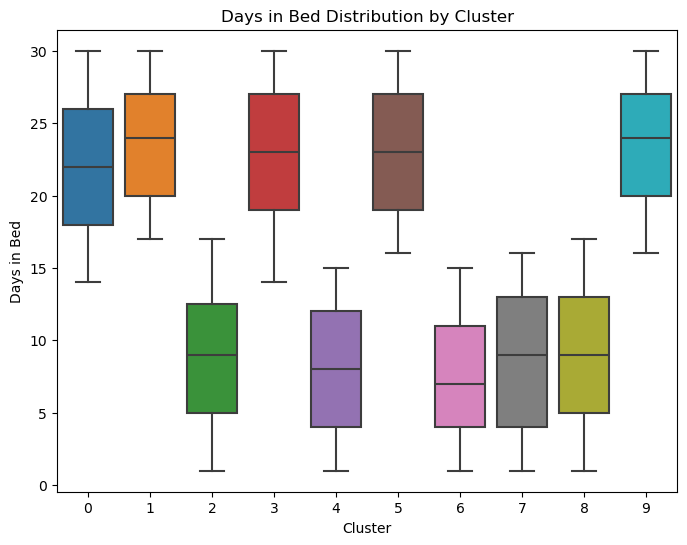

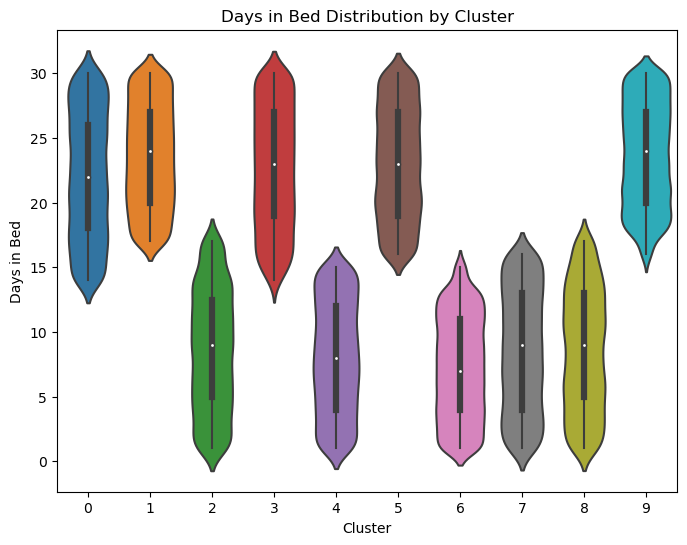

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Days in bed', data=hc_df)
plt.title('Days in Bed Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days in Bed')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='Cluster', y='Days in bed', data=hc_df)
plt.title('Days in Bed Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days in Bed')
plt.show()

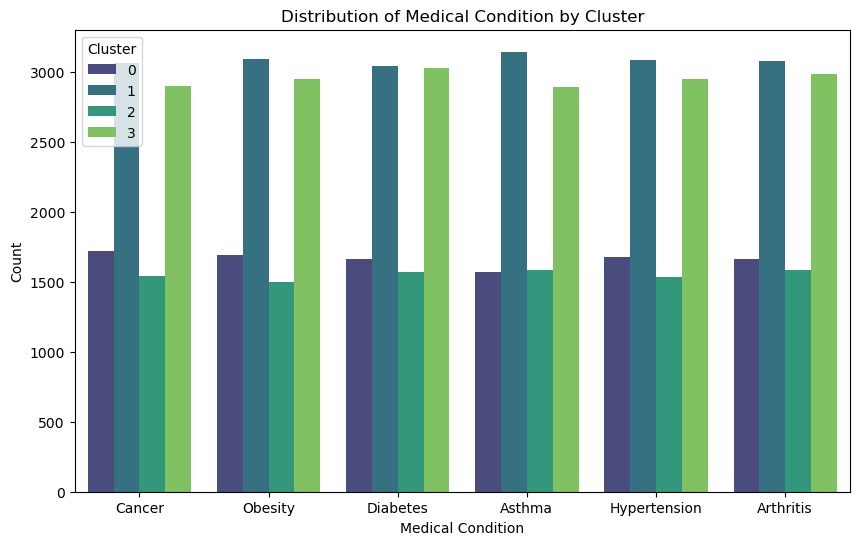

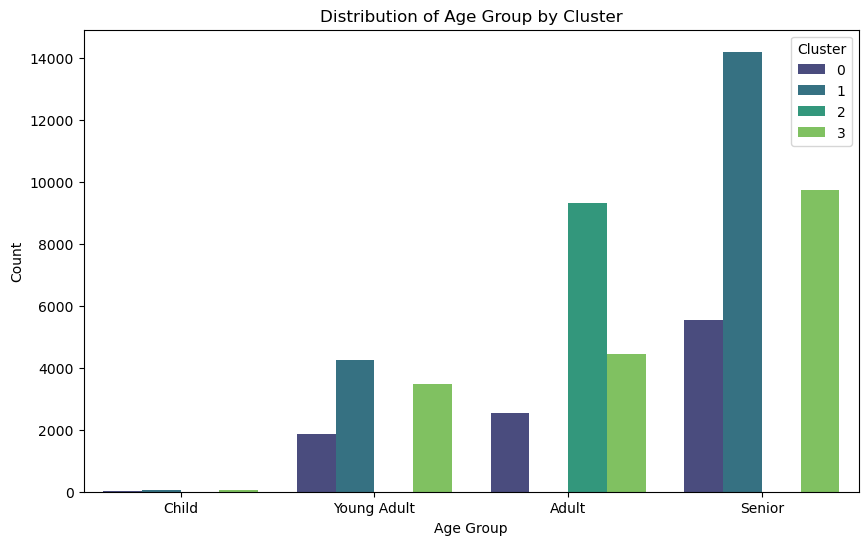

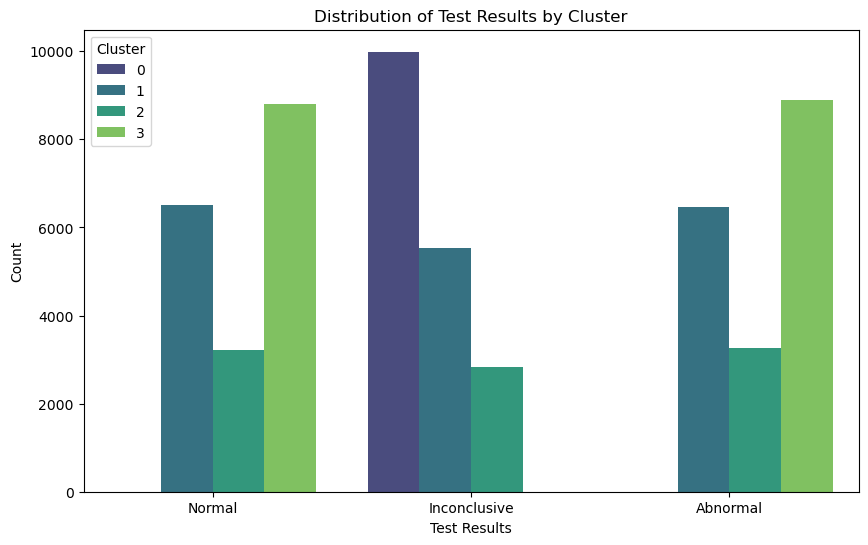

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Medical Condition', 'Age Group', 'Test Results']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=hc_df, x=col, hue='Cluster', palette='viridis')
    plt.title(f'Distribution of {col} by Cluster')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your pipeline has been fitted
preprocessor = pipeline.named_steps['preprocessor']
transformed_data = preprocessor.transform(hc_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(transformed_data)

df_pca = pd.DataFrame(data=pca_result, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = hc_df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# For t-SNE (can be slower for large datasets)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(transformed_data)

df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Cluster'] = hc_df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE Component 1', y='TSNE Component 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

TypeError: PCA only support sparse inputs with the "arpack" solver, while "auto" was passed. See TruncatedSVD for a possible alternative.

In [ ]:
a

### Clusters based on Medical Condition, Medication, and Doctor: 
This could highlight common treatment pathways for different conditions and identify doctors specializing in certain patient groups.


## Optimizing Hospital Resource Allocation:

### Clusters based on Admission Type, Days in Bed, Room Number, and Hospital:
This could help identify patterns in hospital resource utilization, length of stay for different admission types, and potential bottlenecks in specific rooms or hospitals.


### Clusters based on Medical Condition, Admission Type, and Insurance Provider: 
This might reveal differences in admission patterns and lengths of stay based on the type of medical condition and insurance coverage.


## Analyzing Billing and Insurance Patterns:

### Clusters based on Insurance Provider, Billing Amount, and Medical Condition: 
This could help understand the cost of treating different medical conditions under various insurance plans.


### Clusters based on Insurance Provider, Age Group, and Billing Amount: 
This might reveal variations in healthcare costs across different age groups and insurance providers.


## Identifying Patient Demographics and Healthcare Preferences:

### Clusters based on Age, Gender, Blood Type, and Medical Condition: 
This could reveal demographic patterns associated with specific medical conditions.


### Clusters based on Age Group, Hospital, and Doctor: 
This might show preferences for certain hospitals or doctors within specific age groups.
